In [114]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from scipy import io as scio
from sklearn.decomposition import PCA
from scipy.stats import zscore
from scipy import signal
import flammkuchen as fl
import cv2

In [115]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
# persistent homology

In [86]:
fish_id = '220221_f0'
traces = fl.load(r'//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/'+fish_id+'/data_from_suite2p_cells.h5')
signals = signal.detrend(traces['traces'])
coords = traces['coords']
roi_stack = traces['rois_stack']
signals = zscore(signals,axis=-1)
ahb_mask = fl.load(r"//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/"+fish_id+"/ahb_polygon.h5")
ahb_idx = []
ahb_traces = []
ahb_coords = []
for idx,i in enumerate(coords):
    for plane in ahb_mask:
        if i[0] == plane[0][0]:
            if cv2.pointPolygonTest(plane[:,1:].astype(np.float32),[i[1],i[2]],False) > 0:
                ahb_idx.append(idx)
                ahb_traces.append(signals[idx])
                ahb_coords.append(i)
ahb_traces = np.array(ahb_traces)
ahb_traces.shape
traces = ahb_traces

In [112]:
temp = scio.loadmat('210601_f3_natmov_spont_traces_behavior_export.mat')
traces = temp['traces'].T
theta = temp['theta_turned'].flatten()
ring_idxs = temp['ring_idxs'][0]-1
anti_traces = []
rank_traces = []
for idx,i in enumerate(traces):
    if idx in ring_idxs:
        anti_traces.append(i)
    else:
        rank_traces.append(i)
traces = np.array(anti_traces+rank_traces[:400])

C:\Users\SHuang\anaconda3\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


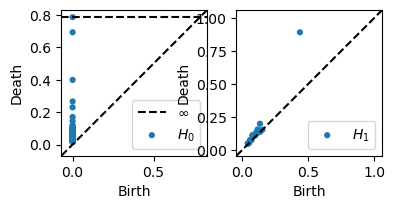

In [37]:
haha = ripser(traces,do_cocycles =True,coeff =3,maxdim =1,metric='cosine')
dgms = haha['dgms']
# Plot each diagram by itself
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(131))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(132))

In [41]:
haha['dgms'][1]

array([[0.43579292, 0.89048368],
       [0.15185964, 0.15232009],
       [0.13583374, 0.13702196],
       [0.1331836 , 0.1974327 ],
       [0.12673002, 0.13882184],
       [0.12268126, 0.13143802],
       [0.11790895, 0.14062184],
       [0.11493897, 0.15427566],
       [0.10396957, 0.13053429],
       [0.09812653, 0.10905772],
       [0.07532763, 0.11066598],
       [0.06862706, 0.07255751],
       [0.05797654, 0.07423854],
       [0.05527622, 0.06345588],
       [0.04903483, 0.04918951],
       [0.04599839, 0.04779315],
       [0.0401479 , 0.04801786]])

In [38]:
idx_list = np.argsort(-np.array([len(np.unique(i[:,:2])) for i in haha['cocycles'][1]]))[:15]
np.sort(-np.array([len(np.unique(i[:,:2])) for i in haha['cocycles'][1]]))[:15]

array([-32,  -7,  -6,  -5,  -4,  -4,  -4,  -4,  -4,  -3,  -3,  -2,  -2,
        -2,  -2])

0 32
[ 0 10 11 12 17 23 26 29 30 31 39 42 43 50 51 53 56 58 59 60 62 63 66 68
 72 73 74 77 78 84 85 91]


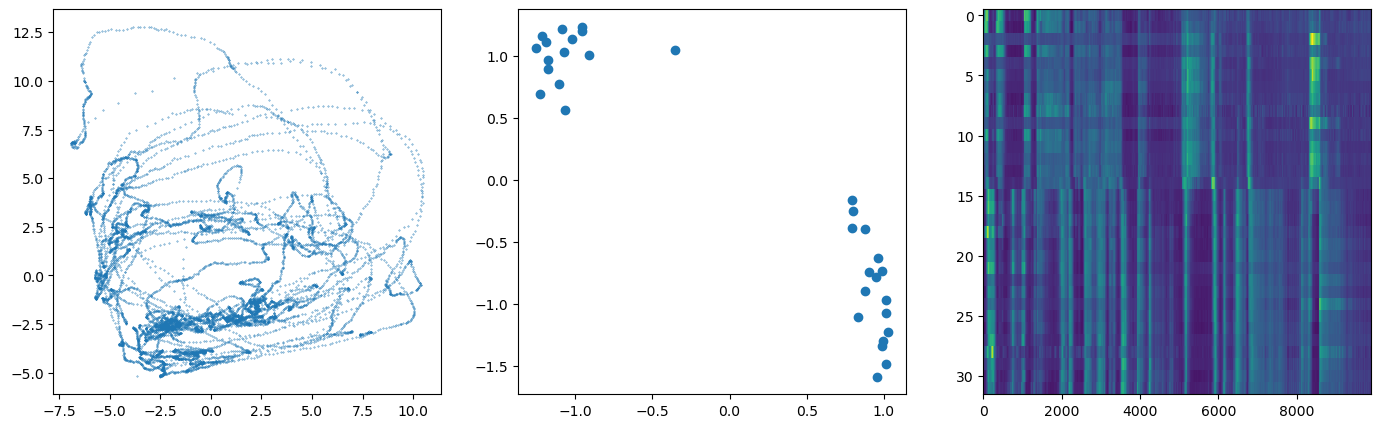

7 7
[16 20 36 38 45 69 86]


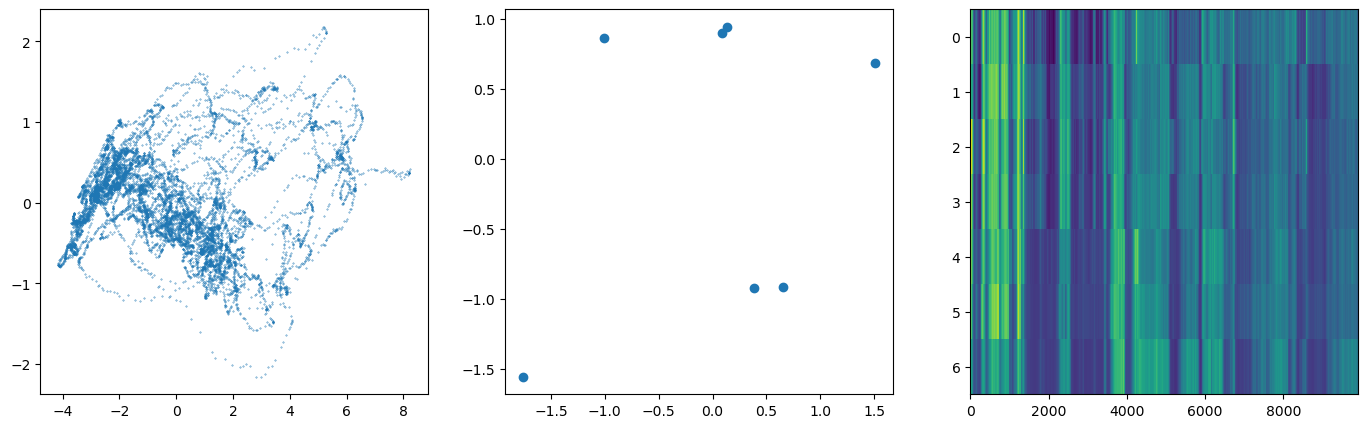

10 6
[10 25 29 33 43 58]


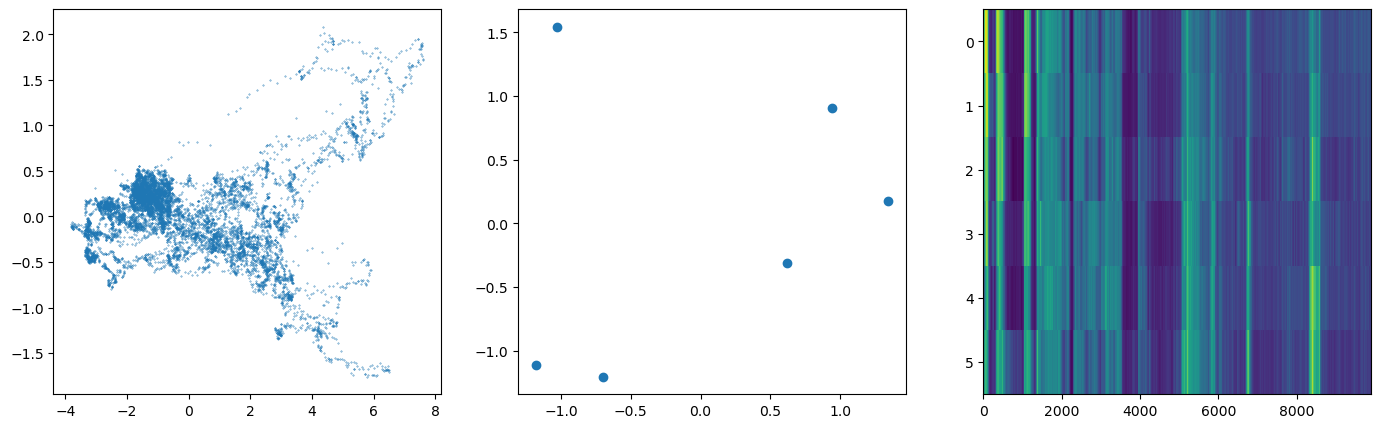

6 5
[16 20 36 45 69]


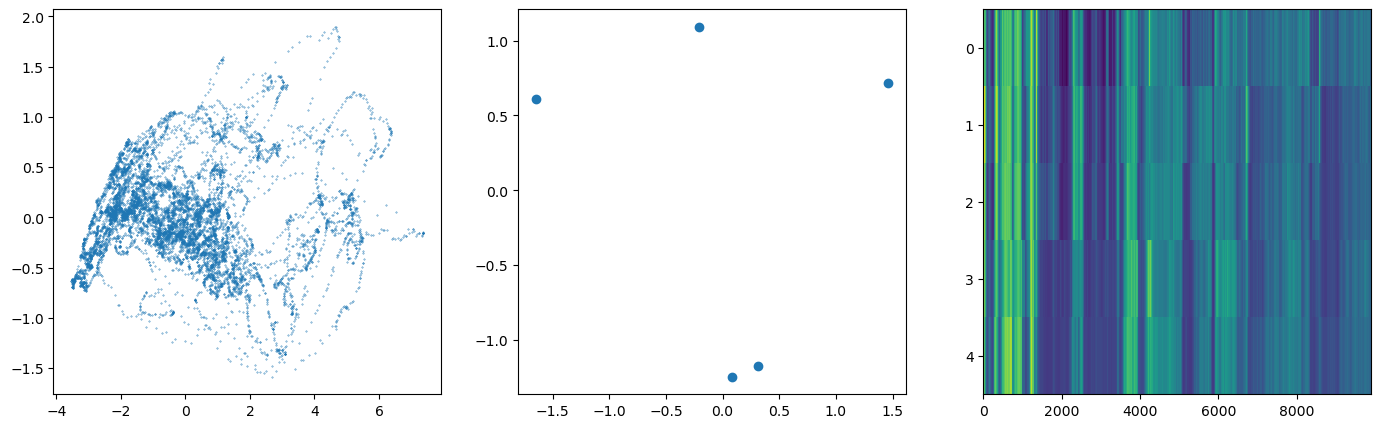

12 4
[46 62 63 77]


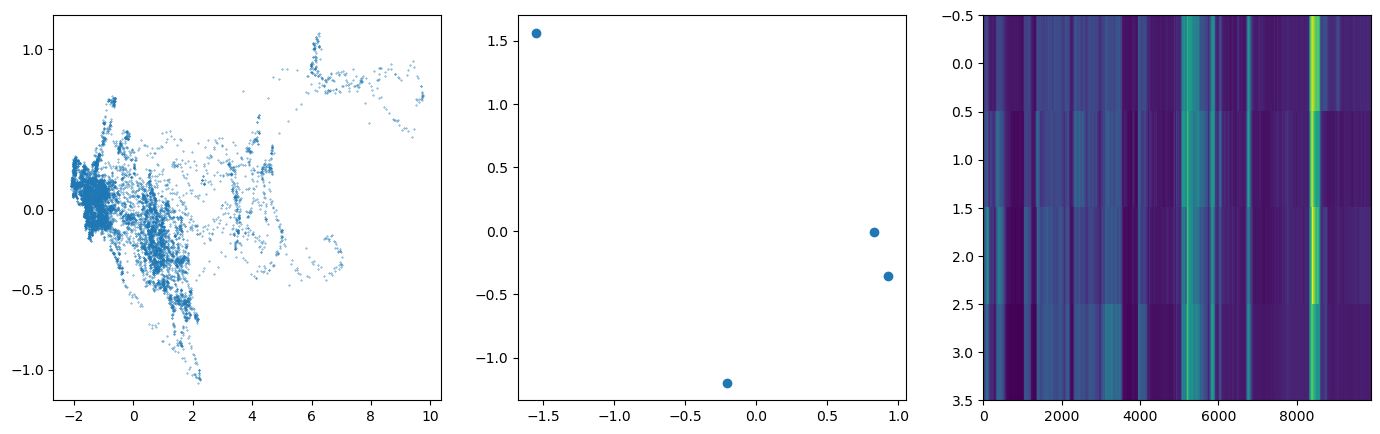

9 4
[25 29 33 58]


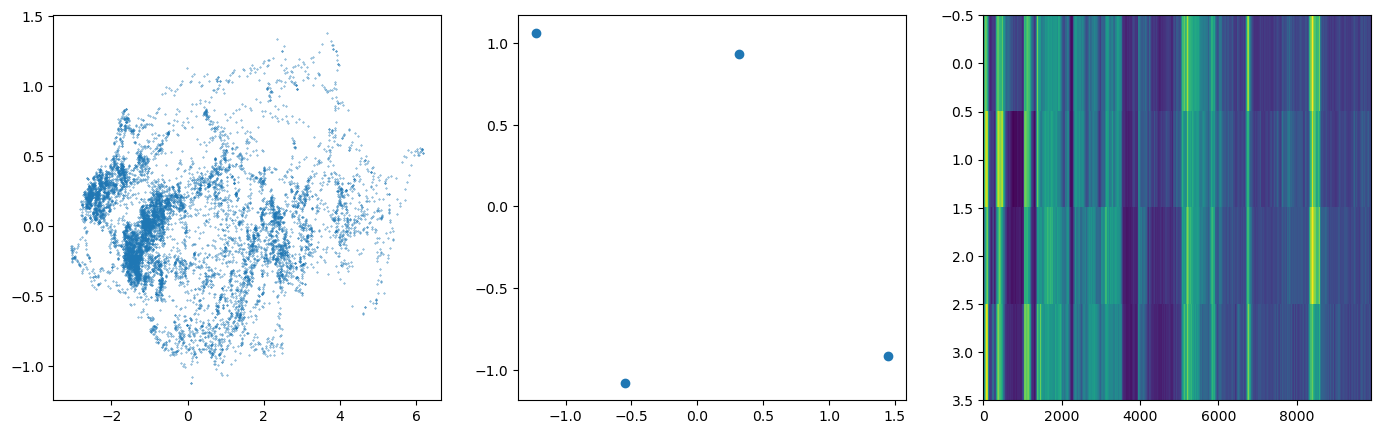

8 4
[13 67 80 94]


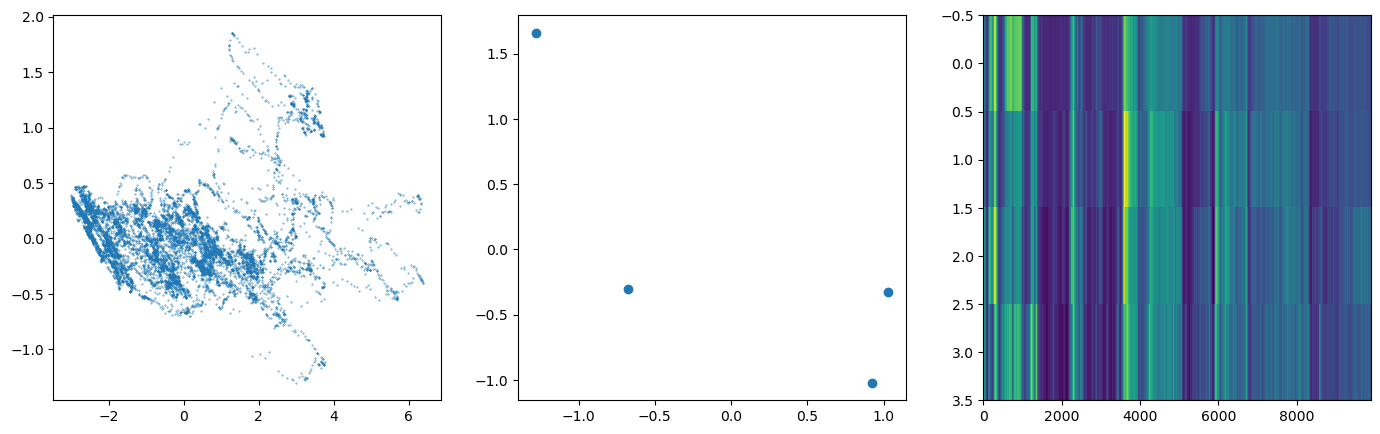

4 4
[22 44 54 97]


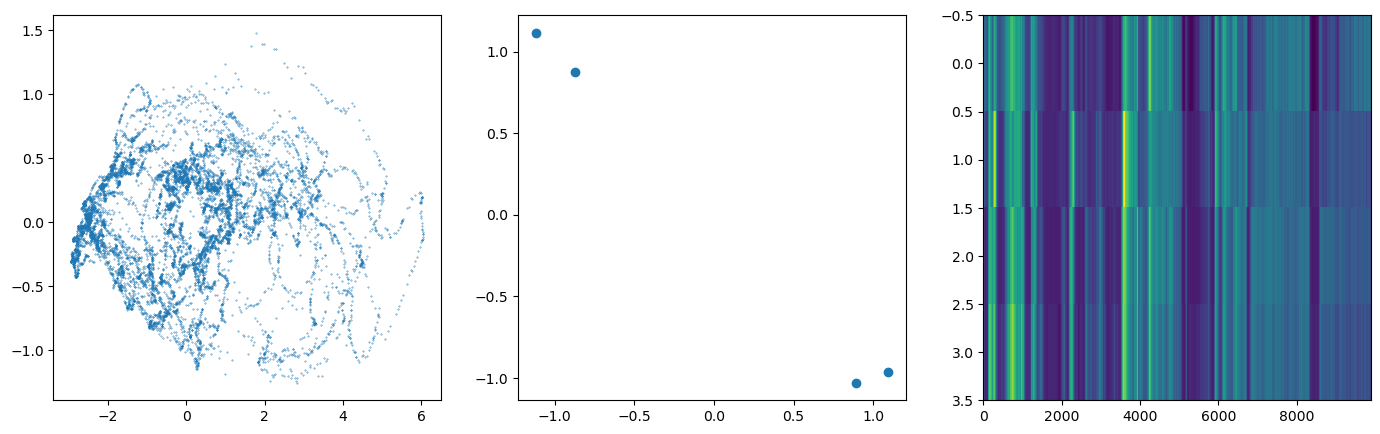

16 4
[50 59 72 73]


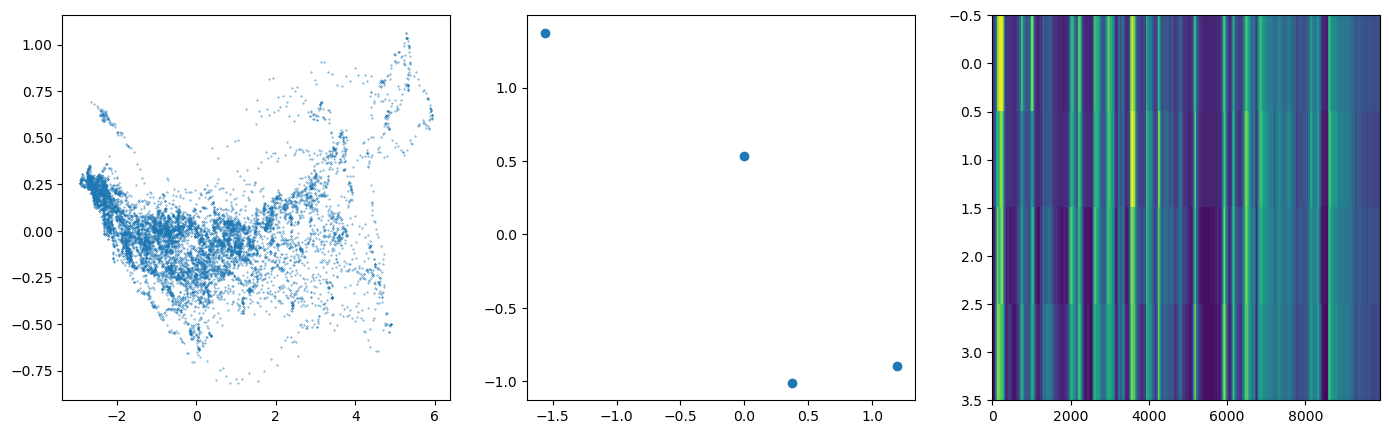

15 3
[2 6 7]


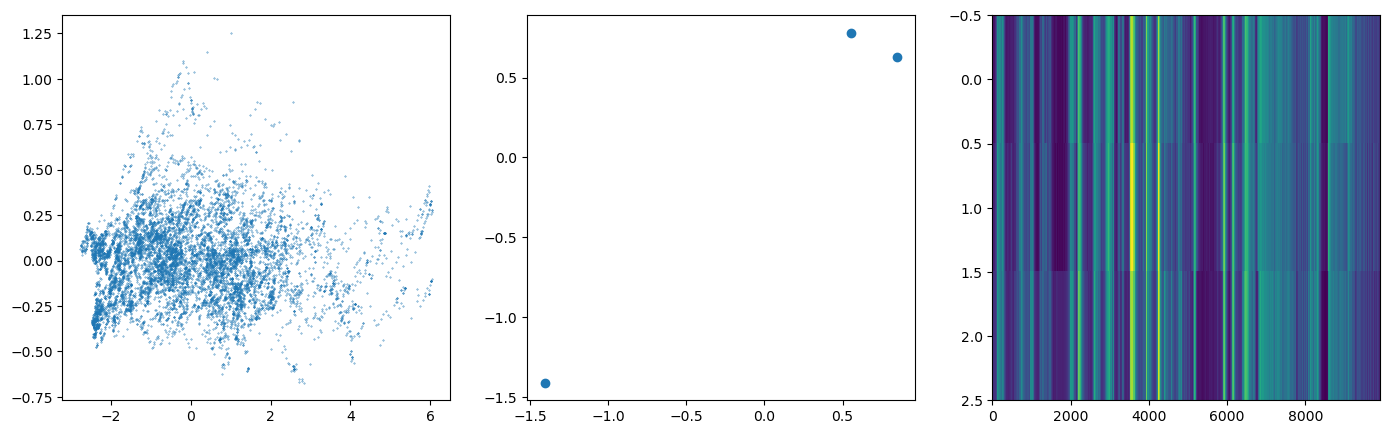

3 3
[24 41 57]


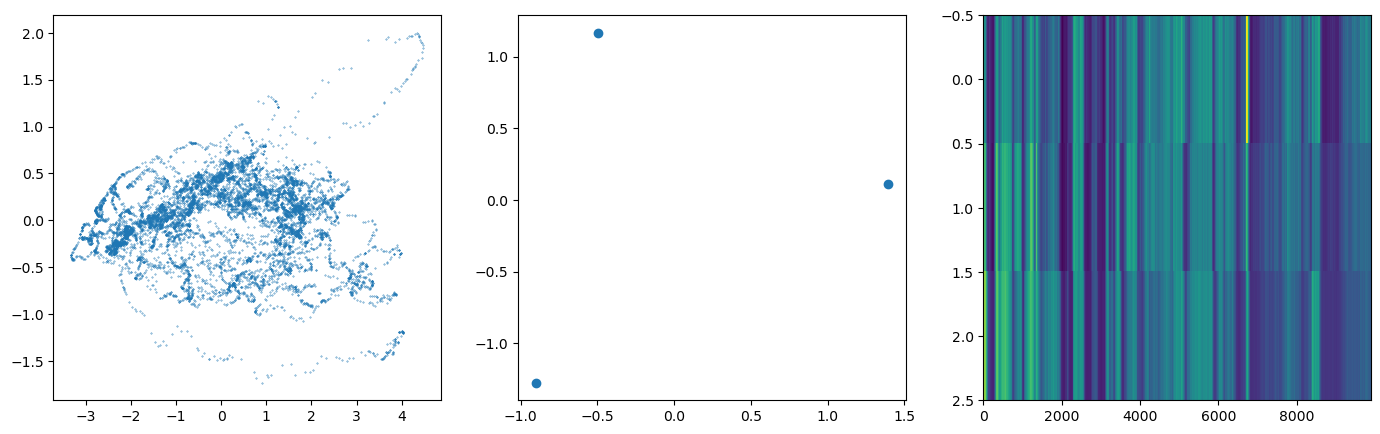

2 2
[54 97]


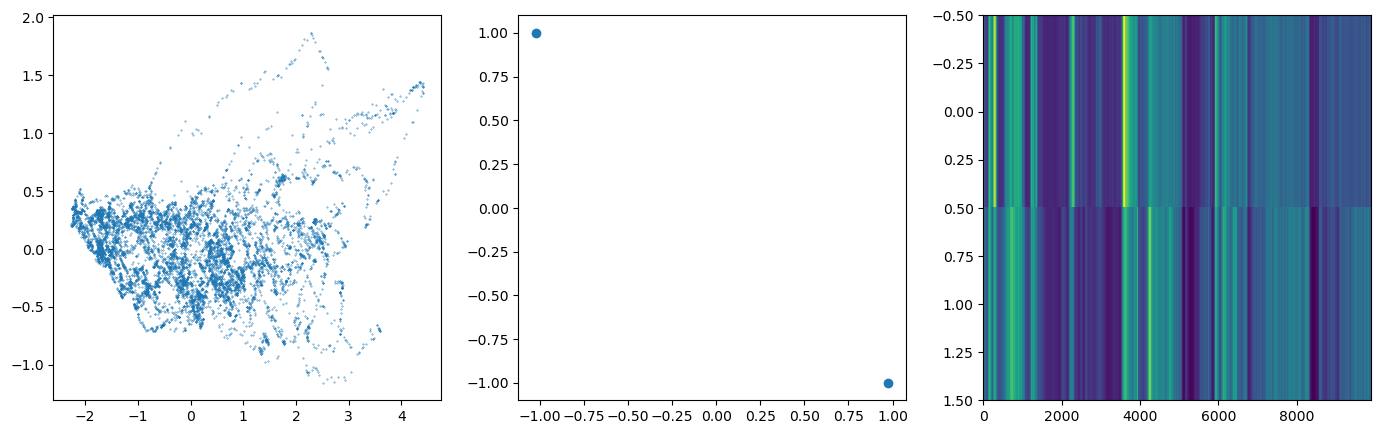

11 2
[18 28]


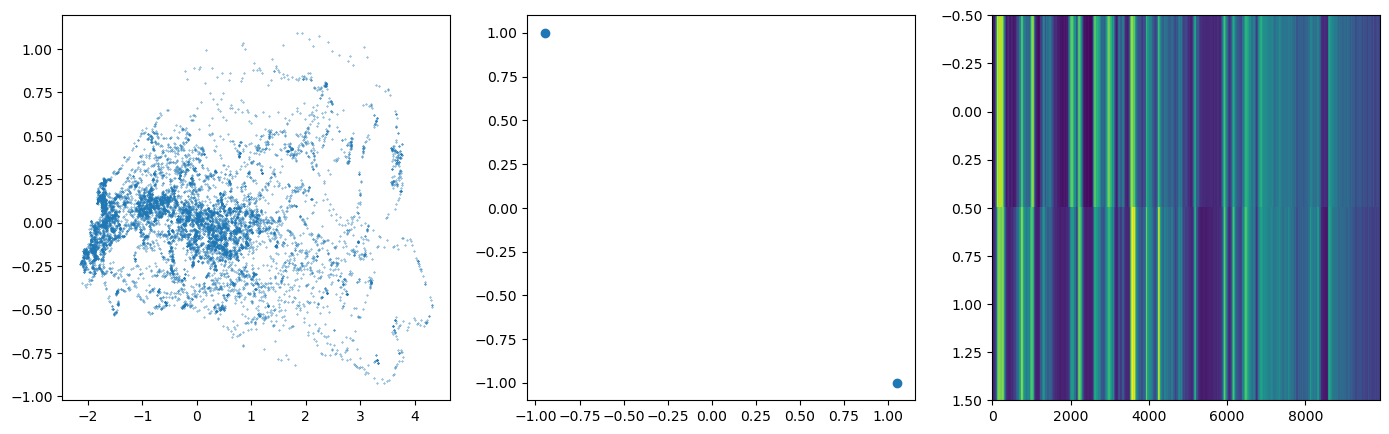

1 2
[26 91]


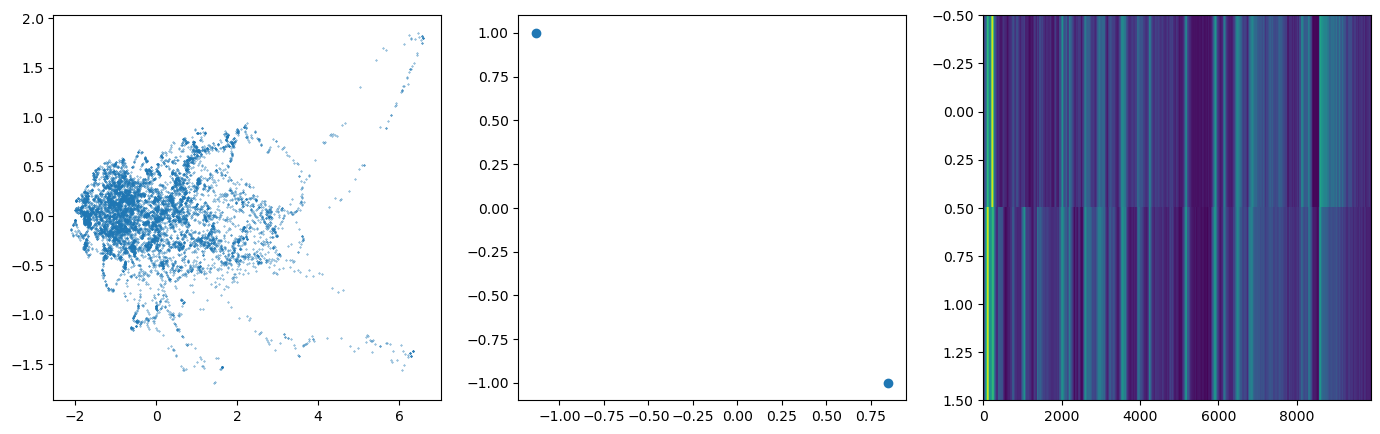

13 2
[11 60]


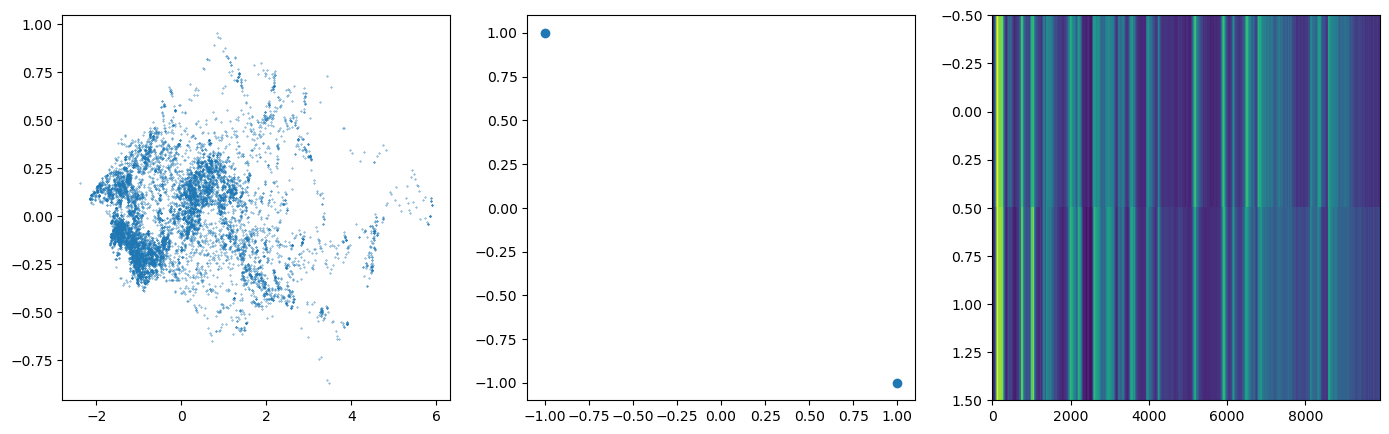

In [39]:
for idx in idx_list:
    fig,ax = plt.subplots(1,3,figsize=(17,5))
    my_traces = []
    for i in np.unique(haha['cocycles'][1][idx][:,:2]):
        my_traces.append(traces[i])
    my_traces = np.array(my_traces)
    pca = PCA(n_components=2)
    activity_pca = pca.fit_transform(my_traces.T).T
    print(idx,len(my_traces))
    print(np.unique(haha['cocycles'][1][idx][:,:2]))
    ax[0].scatter(activity_pca[0],activity_pca[1], s=.1)
    weight_1 = np.sum(my_traces*activity_pca[0],axis=1)
    weight_1 = zscore(weight_1)
    weight_2 = np.sum(my_traces*activity_pca[1],axis=1)
    weight_2 = zscore(weight_2)
    ax[1].scatter(weight_1,weight_2)
    angle = []
    for iidx,i in enumerate(my_traces):
        angle.append(np.angle(weight_1[iidx]+1j*weight_2[iidx]))
    my_traces = my_traces[np.argsort(-np.array(angle))]
    ax[2].imshow(my_traces, aspect='auto',interpolation='none')
    plt.show()

In [117]:
# consistency of the bump 

In [96]:
temp = scio.loadmat('210601_f0_natmov_noeyes_traces_behavior_export.mat')
traces = temp['traces'].T
theta = temp['theta_turned'].flatten()
ring_idxs = temp['ring_idxs'][0]-1
anti_traces = []
rank_traces = []
for idx,i in enumerate(traces):
    if idx in ring_idxs:
        anti_traces.append(i)
    else:
        rank_traces.append(i)
traces = np.array(anti_traces+rank_traces)
frame_rate = 5

In [454]:
fish_id = '220223_f1b'
traces = fl.load(r'//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/'+fish_id+'/data_from_suite2p_cells.h5')
signals = signal.detrend(traces['traces'])
coords = traces['coords']
roi_stack = traces['rois_stack']
signals = zscore(signals,axis=-1)
ahb_mask = fl.load(r"//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/"+fish_id+"/ahb_polygon.h5")
ahb_idx = []
ahb_traces = []
ahb_coords = []
for idx,i in enumerate(coords):
    for plane in ahb_mask:
        if i[0] == plane[0][0]:
            if cv2.pointPolygonTest(plane[:,1:].astype(np.float32),[i[1],i[2]],False) > 0:
                ahb_idx.append(idx)
                ahb_traces.append(signals[idx])
                ahb_coords.append(i)
ahb_traces = np.array(ahb_traces)
ahb_traces.shape
traces = ahb_traces
frame_rate = 2
bouts = fl.load(r'//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/'+fish_id+'/bouts_df.h5')
# get turning bouts
thres_med_vig = 0.1
thres_bias = 0.1
theta = np.zeros(signals.shape[1]) # for turning bouts
motion = np.zeros(signals.shape[1]) # for all motion
all_theta = np.zeros(signals.shape[1]) # for visuilization
# number of all bouts captured from bouter
print(len(bouts['t_start']))
for i,k,j,l in zip(bouts['t_start'],bouts['duration'],bouts['bias'],bouts['med_vig']):
    all_theta[round((i+k/2)*2)-3:round((i+k/2)*2)+3] = j
    motion[round((i+k/2)*2)] = 1
    if  j > thres_bias and l > thres_med_vig:
        theta[round((i+k/2)*2)] = 1
    elif  j < -thres_bias and l > thres_med_vig:
        theta[round((i+k/2)*2)] = -1
all_theta[all_theta>thres_bias] = thres_bias
all_theta[all_theta<-thres_bias] = -thres_bias
# number of turning bouts captured from bouter
sum(theta!=0)

113


101

In [97]:
pieces = []
last_idx = np.nan
flag = False
for idx,i in enumerate(theta):
    if i == 0:
        if flag == False:
            last_idx = idx
            flag = True
        if flag == True:
            if idx - last_idx > 20*frame_rate:
                pieces.append([last_idx+5*frame_rate,idx])
                flag = False
                last_idx = np.nan
            continue
    if i != 0:
        if flag == False:
            continue
        if flag == True:
            pieces.append([last_idx+5*frame_rate,idx-5*frame_rate])
            flag = False
            last_idx = np.nan
pieces = [i for i in pieces if (i[1]-i[0])>5*frame_rate]
len(pieces)

37

In [98]:
traces.shape

(1510, 11100)

In [99]:
piece_std = np.zeros((len(pieces),len(traces)))
piece_mean = np.zeros((len(pieces),len(traces)))
for idx,i in enumerate(pieces):
    piece_std[idx] = np.std(traces[:,i[0]:i[1]],axis=1)
    piece_mean[idx] = np.mean(traces[:,i[0]:i[1]],axis=1)

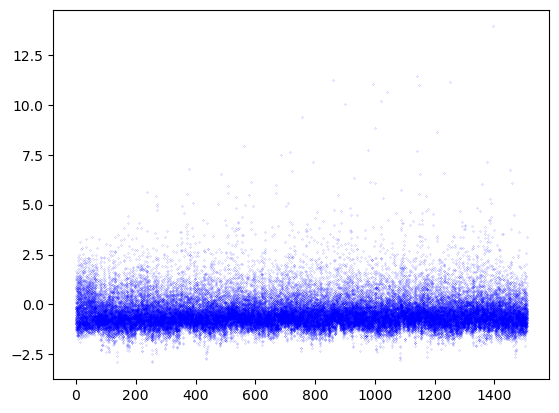

In [100]:
for idx,i in enumerate(piece_mean):
    plt.scatter(range(len(traces)),i,s=.01,c='b')

<StemContainer object of 3 artists>

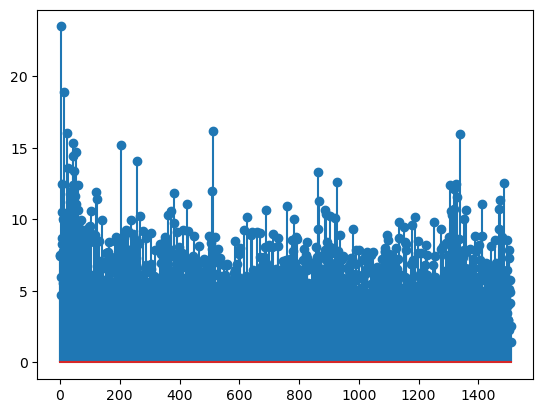

In [101]:
plt.stem((np.percentile(piece_mean,75,axis=0)-np.percentile(piece_mean,25,axis=0))/np.median(piece_std,axis=0))
#np.argsort(-np.percentile(piece_mean,55,axis=0)+np.percentile(piece_mean,45,axis=0))

(array([ 24.,  58., 102., 135., 120., 123., 124., 114., 116.,  90.,  91.,
         71.,  56.,  60.,  52.,  36.,  35.,  25.,  12.,  14.,  10.,   8.,
          5.,   7.,   2.,   7.,   0.,   3.,   1.,   1.,   1.,   2.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.34653972,  1.78900263,  2.23146554,  2.67392845,  3.11639136,
         3.55885427,  4.00131718,  4.44378009,  4.886243  ,  5.32870591,
         5.77116881,  6.21363172,  6.65609463,  7.09855754,  7.54102045,
         7.98348336,  8.42594627,  8.86840918,  9.31087209,  9.753335  ,
        10.19579791, 10.63826082, 11.08072373, 11.52318663, 11.96564954,
        12.40811245, 12.85057536, 13.29303827, 13.73550118, 14.17796409,
        14.620427  , 15.06288991, 15.50535282, 15.94781573, 16.39027864,
        16.83274155, 17.27520445, 17.71766736, 18.16013027, 18.60259318,
        19.04505609, 19.487519  , 19.92998191, 20.37244482, 20.81490773,
 

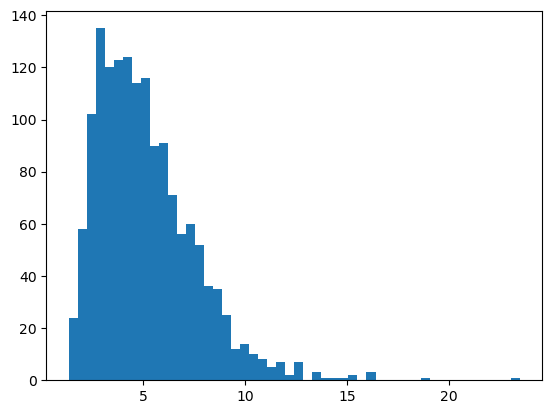

In [102]:
plt.hist((np.percentile(piece_mean,75,axis=0)-np.percentile(piece_mean,25,axis=0))/np.median(piece_std,axis=0),50)

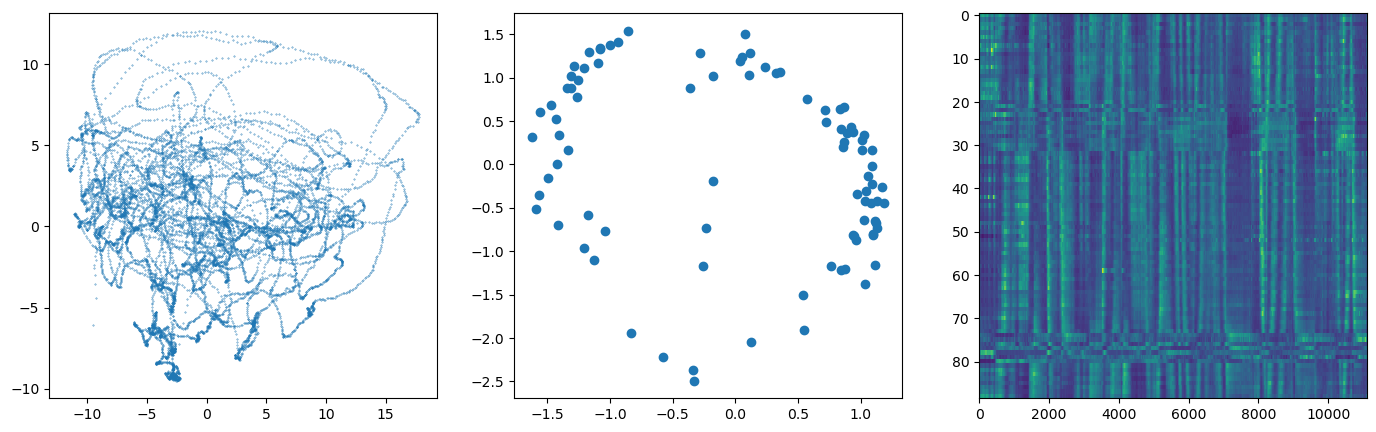

In [107]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
my_traces = []
anti_corr = np.min(np.corrcoef(traces),axis=0)
for i in np.where(((np.percentile(piece_mean,75,axis=0)-np.percentile(piece_mean,25,axis=0))/np.median(piece_std,axis=0))>0)[0]:
    if anti_corr[i] < -0.6:
        my_traces.append(traces[i])
my_traces = np.array(my_traces)
pca = PCA(n_components=2)
activity_pca = pca.fit_transform(my_traces.T).T
ax[0].scatter(activity_pca[0],activity_pca[1], s=.1)
weight_1 = np.sum(my_traces*activity_pca[0],axis=1)
weight_1 = zscore(weight_1)
weight_2 = np.sum(my_traces*activity_pca[1],axis=1)
weight_2 = zscore(weight_2)
ax[1].scatter(weight_1,weight_2)
angle = []
for iidx,i in enumerate(my_traces):
    angle.append(np.angle(weight_1[iidx]+1j*weight_2[iidx]))
my_traces = my_traces[np.argsort(-np.array(angle))]
ax[2].imshow(my_traces, aspect='auto',interpolation='none')
plt.show()

In [118]:
# non-linear dimensional reduction

In [125]:
temp = scio.loadmat('210601_f0_natmov_noeyes_traces_behavior_export.mat')
traces = temp['traces'].T
theta = temp['theta_turned'].flatten()
ring_idxs = temp['ring_idxs'][0]-1
anti_traces = []
rank_traces = []
for idx,i in enumerate(traces):
    if idx in ring_idxs:
        anti_traces.append(i)
    else:
        rank_traces.append(i)
traces = np.array(anti_traces+rank_traces)
frame_rate = 5

In [ ]:
fish_id = '220223_f1b'
traces = fl.load(r'//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/'+fish_id+'/data_from_suite2p_cells.h5')
signals = signal.detrend(traces['traces'])
coords = traces['coords']
roi_stack = traces['rois_stack']
signals = zscore(signals,axis=-1)
ahb_mask = fl.load(r"//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/"+fish_id+"/ahb_polygon.h5")
ahb_idx = []
ahb_traces = []
ahb_coords = []
for idx,i in enumerate(coords):
    for plane in ahb_mask:
        if i[0] == plane[0][0]:
            if cv2.pointPolygonTest(plane[:,1:].astype(np.float32),[i[1],i[2]],False) > 0:
                ahb_idx.append(idx)
                ahb_traces.append(signals[idx])
                ahb_coords.append(i)
ahb_traces = np.array(ahb_traces)
ahb_traces.shape
traces = ahb_traces
frame_rate = 2
bouts = fl.load(r'//FUNES/Shared/experiments/E0040_motions_cardinal/v21/ls/h2b_wb/'+fish_id+'/bouts_df.h5')
# get turning bouts
thres_med_vig = 0.1
thres_bias = 0.1
theta = np.zeros(signals.shape[1]) # for turning bouts
motion = np.zeros(signals.shape[1]) # for all motion
all_theta = np.zeros(signals.shape[1]) # for visuilization
# number of all bouts captured from bouter
print(len(bouts['t_start']))
for i,k,j,l in zip(bouts['t_start'],bouts['duration'],bouts['bias'],bouts['med_vig']):
    all_theta[round((i+k/2)*2)-3:round((i+k/2)*2)+3] = j
    motion[round((i+k/2)*2)] = 1
    if  j > thres_bias and l > thres_med_vig:
        theta[round((i+k/2)*2)] = 1
    elif  j < -thres_bias and l > thres_med_vig:
        theta[round((i+k/2)*2)] = -1
all_theta[all_theta>thres_bias] = thres_bias
all_theta[all_theta<-thres_bias] = -thres_bias
# number of turning bouts captured from bouter
sum(theta!=0)

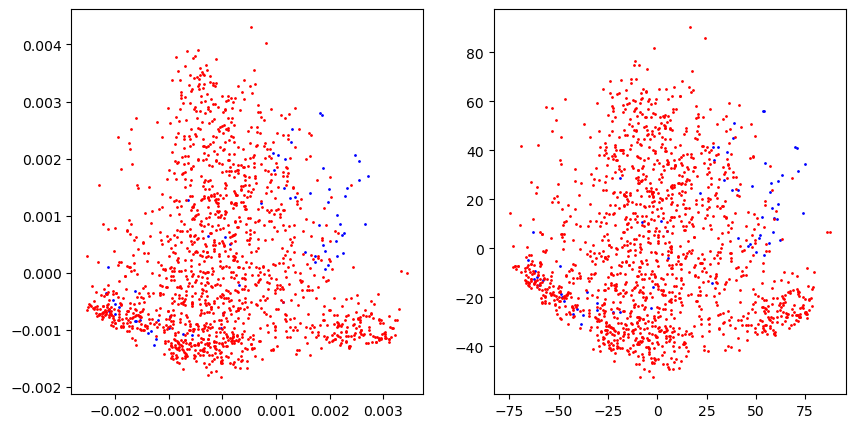

In [138]:
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
# left is nonlinear, right is pca
fig,axes = plt.subplots(1,2,figsize=(10,5))
embedding = SpectralEmbedding(n_components=2,affinity = 'rbf',gamma=1/traces.shape[1])
X_transformed = embedding.fit_transform(traces)
axes[0].scatter(X_transformed[:len(ring_idxs),0],X_transformed[:len(ring_idxs),1],c='b',s=1)
axes[0].scatter(X_transformed[len(ring_idxs):,0],X_transformed[len(ring_idxs):,1],c='r',s=1)
embedding = PCA(n_components=2)
X_transformed = embedding.fit_transform(traces)
axes[1].scatter(X_transformed[:len(ring_idxs),0],X_transformed[:len(ring_idxs),1],c='b',s=1)
axes[1].scatter(X_transformed[len(ring_idxs):,0],X_transformed[len(ring_idxs):,1],c='r',s=1)